In [ ]:
!pip install pyspark 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 281.4/281.4 MB 4.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.7/199.7 KB 10.4 MB/s eta 0:00:00
  Created wheel for pyspark: filename=pyspark-3.3.2-py2.py3-none-any.whl size=281824025 sha256=dce966293b9a38f9b3e956347ed99fe524d98a431cf254deee68b0984370bfd7
  Stored in directory: /root/.cache/pip/wheels/6c/e3/9b/0525ce8a69478916513509d43693511463c6468db0de237c86
Successfully built pyspark


In [ ]:
pip install sorted_months_weekdays

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sorted_months_weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3248 sha256=6f14e486f561a8447cb0ee375173e1ccd2d2e45e006f221177145ab314f2368f
  Stored in directory: /root/.cache/pip/wheels/2a/70/02/2addaa9d5ffdc61dcd436a3c6eed123aea9053591367bcf584
Successfully built sorted_months_weekdays


In [ ]:
pip install sort_dataframeby_monthorweek

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for sort_dataframeby_monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3439 sha256=e07ba7c8c65c392f18b4e1346f42e169a381ae305b888cbcceff12d3f278e4f6
  Stored in directory: /root/.cache/pip/wheels/94/66/fa/f621d4b2c9c3eeb09cbd33697f4bb60bfe9d3d900d3a59329d
Successfully built sort_dataframeby_monthorweek


In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as pdr
import pyspark
from pyspark.sql.functions import col, udf,sum, desc,asc,when,regexp_replace,count_distinct
from pyspark.sql.types import DateType
from sorted_months_weekdays import *
from sort_dataframeby_monthorweek import *
pd.get_option("display.max_columns")
import warnings
warnings.filterwarnings("ignore")

In [ ]:
import pyspark
from pyspark.sql import SparkSession

In [ ]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Sales2').getOrCreate()
spark

In [ ]:
# Connected to the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = spark.read.csv('/content/drive/MyDrive/GS Sales Data1.xlsx - GS Sales Data.csv', inferSchema = True, header=True)
df.show()

+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|Row ID|      Order ID|Order Date|Order_Week|Ship Date|Ship_Week|     Ship Mode|Customer ID|   Customer Name|    Segment|Country/Region|        City|State/Province|Postal Code| Region| Regional Manager|     Product ID|       Category|Sub-Category|        Product Name|  Sales|Quantity|Discount|  Profit|Returned|
+------+--------------+----------+----------+---------+---------+--------------+-----------+----------------+-----------+--------------+------------+--------------+-----------+-------+-----------------+---------------+---------------+------------+--------------------+-------+--------+--------+--------+--------+
|     1|US-2019-103800|  1/3/2019|    #NAME?| 1/7/2019|   #NA

In [ ]:
df_target = spark.read.csv('/content/drive/MyDrive/GS Sales Data_Daily Target.csv', inferSchema = True, header=True)
df_target = df_target.drop('_c4', '_c5')
df_target.show()

+---------------+----------+-----------+------------+
|       Category|Order Date|    Segment|Sales Target|
+---------------+----------+-----------+------------+
|Office Supplies|  1/3/2019|   Consumer|          15|
|Office Supplies|  1/4/2019|Home Office|         300|
|Office Supplies|  1/5/2019|   Consumer|          21|
|      Furniture|  1/6/2019|Home Office|        2316|
|Office Supplies|  1/6/2019|   Consumer|          17|
|Office Supplies|  1/6/2019|  Corporate|          14|
|Office Supplies|  1/6/2019|Home Office|         699|
|     Technology|  1/6/2019|Home Office|        1068|
|      Furniture|  1/7/2019|   Consumer|          81|
|Office Supplies|  1/7/2019|   Consumer|          11|
|Office Supplies|  1/9/2019|   Consumer|           9|
|     Technology|  1/9/2019|   Consumer|          29|
|      Furniture| 1/10/2019|  Corporate|          47|
|Office Supplies| 1/10/2019|  Corporate|           3|
|      Furniture| 1/11/2019|   Consumer|           9|
|      Furniture| 1/13/2019|

In [ ]:
df.count()

10194

In [ ]:
df.columns

['Row ID',
 'Order ID',
 'Order Date',
 'Order_Week',
 'Ship Date',
 'Ship_Week',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'Country/Region',
 'City',
 'State/Province',
 'Postal Code',
 'Region',
 'Regional Manager',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Returned']

In [ ]:
# Rename the columns
df = df.withColumnRenamed('Row ID', 'RowID').withColumnRenamed('Order ID',
                          'OrderID').withColumnRenamed('Customer ID',
                                                       'CustomerID').withColumnRenamed('Customer Name',
                                                                                      'CustomerName').withColumnRenamed('Product ID',
                                                                                                                       'ProductID').withColumnRenamed('Postal Code', 'PostalCode')
df = df.withColumnRenamed('Product Name',
                          'ProductName').withColumnRenamed('Regional Manager',
                                                       'RegionalManager').withColumnRenamed('Customer Name',
                                                                                      'CustomerName').withColumnRenamed('Sub-Category',
                                                                                                                       'SubCategory').withColumnRenamed('Country/Region',
                                                                                                                       'Country_Region').withColumnRenamed('State/Province',
                                                                                                                       'State_Province')
df = df.withColumnRenamed('Order Date',
                          'OrderDate').withColumnRenamed('Ship Date',
                                                       'ShipDate').withColumnRenamed('Ship Mode',
                                                                                      'ShipMode')

In [ ]:
df.columns

['RowID',
 'OrderID',
 'OrderDate',
 'Order_Week',
 'ShipDate',
 'Ship_Week',
 'ShipMode',
 'CustomerID',
 'CustomerName',
 'Segment',
 'Country_Region',
 'City',
 'State_Province',
 'PostalCode',
 'Region',
 'RegionalManager',
 'ProductID',
 'Category',
 'SubCategory',
 'ProductName',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Returned']

In [ ]:
df_target.count()

4603

In [ ]:
df_target = df_target.withColumnRenamed('Order Date', 'OrderDate').withColumnRenamed('Sales Target', 'SalesTarget')
df_target.columns

['Category', 'OrderDate', 'Segment', 'SalesTarget']

In [ ]:
# Checking the null values
from pyspark.sql import functions as F
df.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df.columns]).show()

+-----+-------+---------+----------+--------+---------+--------+----------+------------+-------+--------------+----+--------------+----------+------+---------------+---------+--------+-----------+-----------+-----+--------+--------+------+--------+
|RowID|OrderID|OrderDate|Order_Week|ShipDate|Ship_Week|ShipMode|CustomerID|CustomerName|Segment|Country_Region|City|State_Province|PostalCode|Region|RegionalManager|ProductID|Category|SubCategory|ProductName|Sales|Quantity|Discount|Profit|Returned|
+-----+-------+---------+----------+--------+---------+--------+----------+------------+-------+--------------+----+--------------+----------+------+---------------+---------+--------+-----------+-----------+-----+--------+--------+------+--------+
|    0|      0|        0|         0|       0|        0|       0|         0|           0|      0|             0|   0|             0|         0|     0|              0|        0|       0|          0|          0|    0|       0|       0|     0|       0|
+---

In [ ]:
from pyspark.sql import functions as F
df_target.select([F.count(F.when(F.isnull(c), c)).alias(c) for c in df_target.columns]).show()

+--------+---------+-------+-----------+
|Category|OrderDate|Segment|SalesTarget|
+--------+---------+-------+-----------+
|       0|        0|      0|          0|
+--------+---------+-------+-----------+



There is no null values in above two dataframes

## **Handling the #N/A values**

In [ ]:
# Checkng #N/A values in each columns
from pyspark.sql.functions import sum, when, col
counts = [df.select(sum(when(col(c).like(f'%#N/A%'), 1)).alias(f'{c}_count')).collect()[0][f'{c}_count'] for c in df.columns]

# print the results
for i, count in enumerate(counts):
     print(f'{df.columns[i]}: {count}')

RowID: None
OrderID: None
OrderDate: None
Order_Week: None
ShipDate: None
Ship_Week: None
ShipMode: None
CustomerID: None
CustomerName: 23
Segment: None
Country_Region: None
City: None
State_Province: 28
PostalCode: None
Region: None
RegionalManager: 17
ProductID: None
Category: 24
SubCategory: None
ProductName: None
Sales: None
Quantity: None
Discount: None
Profit: None
Returned: 9394


In [ ]:
from pyspark.sql.functions import coalesce, first, when
from pyspark.sql.window import Window

# Replace #N/A values in "Customer_Name" column with values from "Customer_ID" column
#df = df.withColumn("CustomerName", coalesce(df["CustomerName"], df["CustomerID"]))

# Create a window to group by "CustomerID"
window1 = Window.partitionBy("CustomerID")

# Replace remaining #N/A values in "CustomerName" with the first non-null value for the same "CustomerID"
df = df.withColumn("CustomerName", when(df["CustomerName"] == "#N/A", first(df["CustomerName"]).over(window1)).otherwise(df["CustomerName"]))

window2 = Window.partitionBy('Region')
df = df.withColumn('RegionalManager', when(df['RegionalManager'] == '#N/A', first(df['RegionalManager']).over(window2)).otherwise(df['RegionalManager']))

window3 = Window.partitionBy('SubCategory')
df = df.withColumn('Category', when(df['Category'] == '#N/A', first(df['Category']).over(window3)).otherwise(df['Category']))

window4 = Window.partitionBy('City')
df = df.withColumn('State_Province', when(df['State_Province'] == '#N/A', first(df['State_Province']).over(window4)).otherwise(df['State_Province']))

In [ ]:
counts = [df.select(sum(when(col(c).like(f'%#N/A%'), 1)).alias(f'{c}_count')).collect()[0][f'{c}_count'] for c in df.columns]

# print the results
for i, count in enumerate(counts):
     print(f'{df.columns[i]}: {count}')

RowID: None
OrderID: None
OrderDate: None
Order_Week: None
ShipDate: None
Ship_Week: None
ShipMode: None
CustomerID: None
CustomerName: None
Segment: None
Country_Region: None
City: None
State_Province: None
PostalCode: None
Region: None
RegionalManager: None
ProductID: None
Category: None
SubCategory: None
ProductName: None
Sales: None
Quantity: None
Discount: None
Profit: None
Returned: 9394


In [ ]:
counts1 = [df_target.select(sum(when(col(c).like(f'%#N/A%'), 1)).alias(f'{c}_count')).collect()[0][f'{c}_count'] for c in df_target.columns]

# print the results
for i, count in enumerate(counts1):
     print(f'{df_target.columns[i]}: {count}')

Category: None
OrderDate: None
Segment: None
SalesTarget: None


Now clear all the #N/A values

In [ ]:
df.show()

+-----+--------------+----------+----------+----------+---------+--------------+----------+----------------+-----------+--------------+--------+--------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
|RowID|       OrderID| OrderDate|Order_Week|  ShipDate|Ship_Week|      ShipMode|CustomerID|    CustomerName|    Segment|Country_Region|    City|State_Province|PostalCode| Region|  RegionalManager|      ProductID|       Category|SubCategory|         ProductName|  Sales|Quantity|Discount|  Profit|Returned|
+-----+--------------+----------+----------+----------+---------+--------------+----------+----------------+-----------+--------------+--------+--------------+----------+-------+-----------------+---------------+---------------+-----------+--------------------+-------+--------+--------+--------+--------+
| 9419|US-2022-167976|11/11/2022|    #NAME?|11/14/2022|   #NAME?|  Second Class|  

In [ ]:
df.printSchema()

root
 |-- RowID: integer (nullable = true)
 |-- OrderID: string (nullable = true)
 |-- OrderDate: string (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- ShipDate: string (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- ShipMode: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State_Province: string (nullable = true)
 |-- PostalCode: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- RegionalManager: string (nullable = true)
 |-- ProductID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- SubCategory: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- Return

In [ ]:
from pyspark.sql.functions import to_date

# Cast fields to the correct data types
df = df.withColumn('OrderDate', to_date(df['OrderDate'], 'yyyy-MM-dd'))
df = df.withColumn('ShipDate', to_date(df['ShipDate'], 'yyyy-MM-dd'))
df.printSchema()

root
 |-- RowID: integer (nullable = true)
 |-- OrderID: string (nullable = true)
 |-- OrderDate: date (nullable = true)
 |-- Order_Week: string (nullable = true)
 |-- ShipDate: date (nullable = true)
 |-- Ship_Week: string (nullable = true)
 |-- ShipMode: string (nullable = true)
 |-- CustomerID: string (nullable = true)
 |-- CustomerName: string (nullable = true)
 |-- Segment: string (nullable = true)
 |-- Country_Region: string (nullable = true)
 |-- City: string (nullable = true)
 |-- State_Province: string (nullable = true)
 |-- PostalCode: string (nullable = true)
 |-- Region: string (nullable = true)
 |-- RegionalManager: string (nullable = true)
 |-- ProductID: string (nullable = true)
 |-- Category: string (nullable = true)
 |-- SubCategory: string (nullable = true)
 |-- ProductName: string (nullable = true)
 |-- Sales: double (nullable = true)
 |-- Quantity: integer (nullable = true)
 |-- Discount: double (nullable = true)
 |-- Profit: double (nullable = true)
 |-- Returned: 

In [ ]:
df.createOrReplaceTempView('normalize')
time_df = spark.sql("""SELECT DISTINCT concat(OrderDate, '   ', ShipDate) as Date, Order_Week, Ship_Week FROM normalize""")
Order_df = spark.sql('SELECT distinct OrderID, CustomerID, OrderDate,ShipDate,ShipMode,ProductID,Order_Week,Ship_Week,Quantity, Discount, Sales,Profit, Segment, Returned FROM normalize')
Customer_df = spark.sql('SELECT distinct CustomerID, CustomerName, Country_Region, City, State_Province,PostalCode,Region FROM normalize')
Product_df = spark.sql('SELECT distinct ProductID, ProductName, Category, SubCategory FROM normalize')
Segment_df = spark.sql('SELECT distinct Segment, RegionalManager FROM normalize')

In [ ]:
time_df.show()

+--------------------+----------+---------+
|                Date|Order_Week|Ship_Week|
+--------------------+----------+---------+
|3/10/2019   3/14/...|    #NAME?|   #NAME?|
| 6/4/2019   6/9/2019|    #NAME?|   #NAME?|
|11/1/2019   11/5/...|    #NAME?|   #NAME?|
|2/27/2020   3/1/2020|    #NAME?|   #NAME?|
|4/26/2020   4/30/...|    #NAME?|   #NAME?|
|8/13/2020   8/17/...|    #NAME?|   #NAME?|
|12/22/2020   12/2...|    #NAME?|   #NAME?|
|6/16/2021   6/18/...|    #NAME?|   #NAME?|
|6/30/2021   7/2/2021|    #NAME?|   #NAME?|
|8/23/2021   8/27/...|    #NAME?|   #NAME?|
|9/10/2021   9/14/...|    #NAME?|   #NAME?|
|10/4/2021   10/9/...|    #NAME?|   #NAME?|
|10/7/2021   10/12...|    #NAME?|   #NAME?|
|11/5/2021   11/9/...|    #NAME?|   #NAME?|
|2/17/2022   2/22/...|    #NAME?|   #NAME?|
|9/15/2022   9/17/...|    #NAME?|   #NAME?|
|9/30/2022   10/6/...|    #NAME?|   #NAME?|
|11/7/2022   11/9/...|    #NAME?|   #NAME?|
|11/10/2022   11/1...|    #NAME?|   #NAME?|
|11/19/2022   11/2...|    #NAME?

In [ ]:
Customer_df.show()

+----------+-----------------+--------------+-----------+--------------+----------+-------+
|CustomerID|     CustomerName|Country_Region|       City|State_Province|PostalCode| Region|
+----------+-----------------+--------------+-----------+--------------+----------+-------+
|  JL-15505|  Jeremy Lonsdale| United States|   Aberdeen|  South Dakota|     57401|Central|
|  DK-13375|      Dennis Kane| United States|    Abilene|         Texas|     79605|Central|
|  AT-10435|      Alyssa Tate| United States|      Akron|          Ohio|     44312|   East|
|  EB-13705|       Ed Braxton| United States|      Akron|          Ohio|     44312|   East|
|  JM-15865|      John Murray| United States|      Akron|          Ohio|     44312|   East|
|  KB-16315|       Karl Braun| United States|      Akron|          Ohio|     44312|   East|
|  KH-16630|       Ken Heidel| United States|      Akron|          Ohio|     44312|   East|
|  MB-17305|  Maria Bertelson| United States|      Akron|          Ohio|     443

In [ ]:
Order_df.show()

+--------------+----------+----------+----------+--------------+---------------+----------+---------+--------+--------+-------+--------+-----------+--------+
|       OrderID|CustomerID| OrderDate|  ShipDate|      ShipMode|      ProductID|Order_Week|Ship_Week|Quantity|Discount|  Sales|  Profit|    Segment|Returned|
+--------------+----------+----------+----------+--------------+---------------+----------+---------+--------+--------+-------+--------+-----------+--------+
|US-2019-154165|  DL-13315| 2/17/2019| 2/24/2019|Standard Class|OFF-AR-10003631|    #NAME?|   #NAME?|      14|     0.2| 54.208|  8.8088|   Consumer|    #N/A|
|US-2019-130673|  MC-17590| 5/20/2019| 5/22/2019|  Second Class|FUR-FU-10003489|    #NAME?|   #NAME?|       3|     0.6| 10.332| -5.9409|  Corporate|    #N/A|
|US-2019-111773|  JK-15625| 6/29/2019|  7/3/2019|Standard Class|OFF-BI-10000174|    #NAME?|   #NAME?|       3|     0.2|  13.92|   4.872|   Consumer|    #N/A|
|US-2019-164182|  ST-20530| 7/14/2019| 7/18/2019|Sta

In [ ]:
Product_df.show()

+---------------+--------------------+----------+-----------+
|      ProductID|         ProductName|  Category|SubCategory|
+---------------+--------------------+----------+-----------+
|TEC-AC-10001266|Memorex Micro Tra...|Technology|Accessories|
|TEC-AC-10003174|Plantronics S12 C...|Technology|Accessories|
|TEC-AC-10003628|Logitech 910-0029...|Technology|Accessories|
|TEC-AC-10001432|Enermax Aurora Li...|Technology|Accessories|
|TEC-AC-10000710|Maxell DVD-RAM Discs|Technology|Accessories|
|TEC-AC-10000736|Logitech G600 MMO...|Technology|Accessories|
|TEC-AC-10001284|Enermax Briskie R...|Technology|Accessories|
|TEC-AC-10004353|Hypercom P1300 Pi...|Technology|Accessories|
|TEC-AC-10002001|Logitech Wireless...|Technology|Accessories|
|TEC-AC-10004877|Imation 30456 USB...|Technology|Accessories|
|TEC-AC-10002647|Logitech Wireless...|Technology|Accessories|
|TEC-AC-10002558|Imation Swivel Fl...|Technology|Accessories|
|TEC-AC-10002323|SanDisk Ultra 32 ...|Technology|Accessories|
|TEC-AC-

In [ ]:
Segment_df.show()

+-----------+-----------------+
|    Segment|  RegionalManager|
+-----------+-----------------+
|   Consumer|  Sadie Pawthorne|
|Home Office|  Sadie Pawthorne|
|  Corporate|      Fred Suzuki|
|  Corporate|      Chuck Magee|
|   Consumer|      Chuck Magee|
|Home Office|Roxanne Rodriguez|
|Home Office|      Chuck Magee|
|Home Office|      Fred Suzuki|
|   Consumer|      Fred Suzuki|
|   Consumer|Roxanne Rodriguez|
|  Corporate|Roxanne Rodriguez|
|  Corporate|  Sadie Pawthorne|
+-----------+-----------------+



## **EDA**

In [ ]:
df_1 = df.toPandas()
df_1.head()

,RowID,OrderID,OrderDate,Order_Week,ShipDate,Ship_Week,ShipMode,CustomerID,CustomerName,Segment,...,RegionalManager,ProductID,Category,SubCategory,ProductName,Sales,Quantity,Discount,Profit,Returned
0,9419,US-2022-167976,11/11/2022,#NAME?,11/14/2022,#NAME?,Second Class,JL-15505,Jeremy Lonsdale,Consumer,...,Roxanne Rodriguez,OFF-SU-10004661,Office Supplies,Supplies,Acme Titanium Bonded Scissors,25.500,3,0.0,6.6300,#N/A
1,9945,US-2022-165099,12/11/2022,#NAME?,12/13/2022,#NAME?,First Class,DK-13375,Dennis Kane,Consumer,...,Roxanne Rodriguez,OFF-AP-10001634,Office Supplies,Appliances,Hoover Commercial Lightweight Upright Vacuum,1.392,2,0.8,-3.7584,#N/A
2,2147,US-2020-147662,2/14/2020,#NAME?,2/19/2020,#NAME?,Standard Class,KB-16315,Karl Braun,Consumer,...,Chuck Magee,TEC-AC-10003280,Technology,Accessories,Belkin F8E887 USB Wired Ergonomic Keyboard,71.976,3,0.2,0.8997,#N/A
3,5395,US-2021-136770,8/14/2021,#NAME?,8/18/2021,#NAME?,Standard Class,SP-20650,Stephanie Phelps,Corporate,...,Chuck Magee,TEC-AC-10000420,Technology,Accessories,Logitech G500s Laser Gaming Mouse with Adjusta...,279.960,5,0.2,48.9930,#N/A
4,2143,US-2020-147662,2/14/2020,#NAME?,2/19/2020,#NAME?,Standard Class,KB-16315,Karl Braun,Consumer,...,Chuck Magee,OFF-AR-10004999,Office Supplies,Art,Newell 315,14.352,3,0.2,0.8970,#N/A


In [ ]:
df_1['Category'].replace('#N/A', np.nan, inplace=True)
df_1['Category'].fillna('Technology', inplace=True)

In [ ]:
import pandas as pd

result = df_1.groupby(['Category', 'OrderDate', 'Segment'])['Sales'].sum().reset_index()
result.head()

,Category,OrderDate,Segment,Sales
0,Furniture,1/1/2022,Consumer,975.490
1,Furniture,1/10/2019,Corporate,51.940
2,Furniture,1/10/2020,Consumer,1018.104
3,Furniture,1/10/2021,Consumer,24.850
4,Furniture,1/10/2021,Corporate,79.920


In [ ]:
result.shape

(4646, 4)

In [ ]:
df_2 = df_target.toPandas()
df_2.head()

,Category,OrderDate,Segment,SalesTarget
0,Office Supplies,1/3/2019,Consumer,15
1,Office Supplies,1/4/2019,Home Office,300
2,Office Supplies,1/5/2019,Consumer,21
3,Furniture,1/6/2019,Home Office,2316
4,Office Supplies,1/6/2019,Consumer,17


In [ ]:
df_2.shape

(4603, 4)

In [ ]:
merged_df = pd.merge(result, df_2, on=('Category', 'OrderDate', 'Segment'))
merged_df.head()

,Category,OrderDate,Segment,Sales,SalesTarget
0,Furniture,1/1/2022,Consumer,975.490,907
1,Furniture,1/10/2019,Corporate,51.940,47
2,Furniture,1/10/2020,Consumer,1018.104,967
3,Furniture,1/10/2021,Consumer,24.850,23
4,Furniture,1/10/2021,Corporate,79.920,68


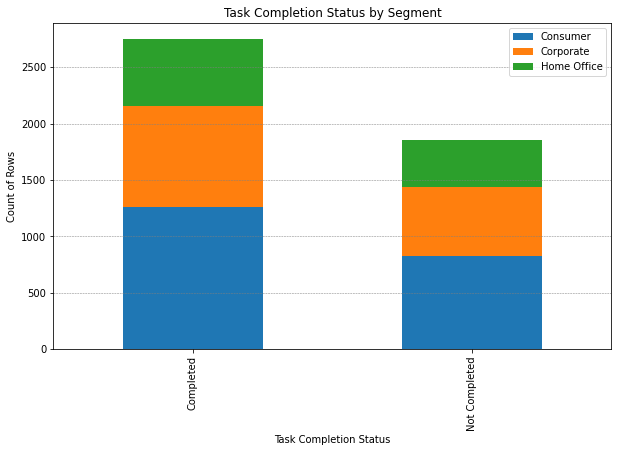

In [ ]:
import matplotlib.pyplot as plt

# Create a new column 'status' in the merged data frame based on the sales and sales target columns
merged_df['status'] = merged_df.apply(lambda row: 'Completed' if row['Sales'] >= row['SalesTarget'] else 'Not Completed', axis=1)

# Create a pivot table to summarize the count of rows by 'status' and 'segment'
pivot_df = pd.pivot_table(merged_df, index='status', columns='Segment', values='Sales', aggfunc='count')

# Plot a stacked bar chart of the pivot table
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6))
ax.grid(True, axis='y', color='gray', linestyle='--', linewidth=0.5)
ax.legend(loc='upper right', bbox_to_anchor=(1.0, 1.0), ncol=1, fontsize='medium')
# Set the chart title and axis labels
plt.title('Task Completion Status by Segment')
plt.xlabel('Task Completion Status')
plt.ylabel('Count of Rows')

# Display the chart
plt.show()


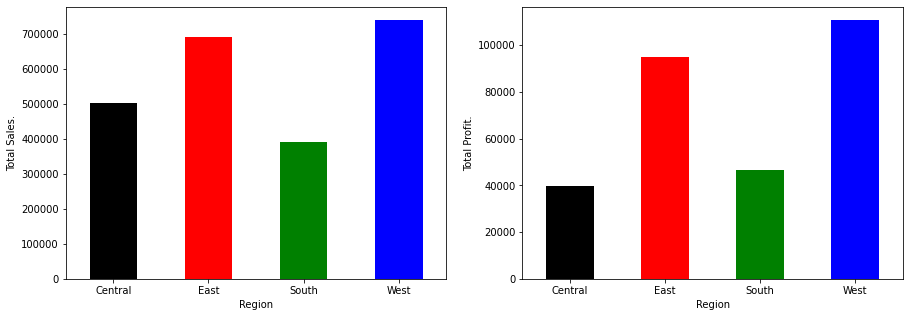

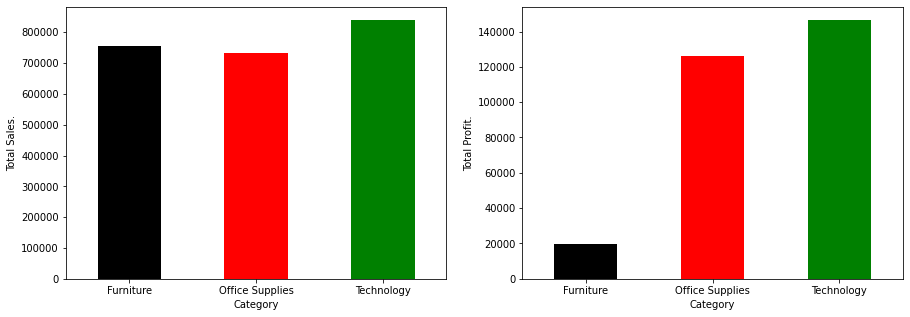

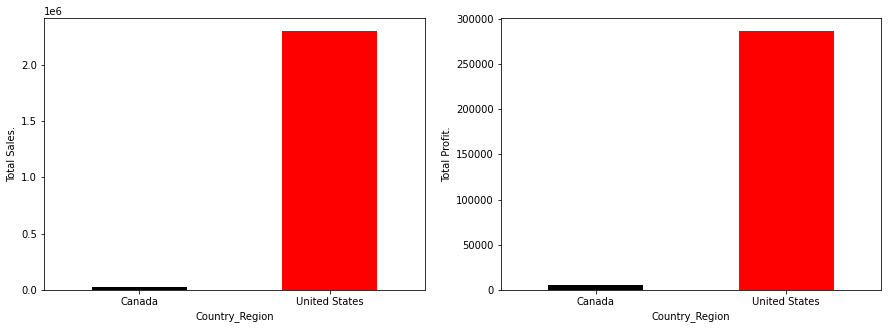

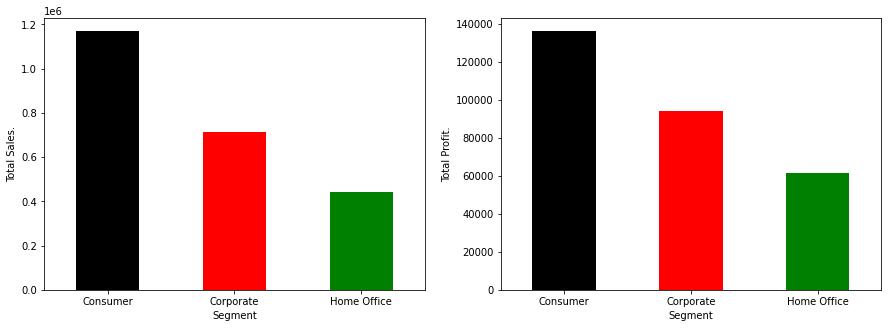

In [ ]:
Categorical_Variables = ['Sales', 'Profit']
def plot_variable(Grouping_Variable):
    plt.figure(figsize= (15,5))
    a = 1
    b = 2
    c = 1
     
    for feature in Categorical_Variables:
        plt.subplot(a,b,c)
        df_1.groupby(Grouping_Variable)[feature].sum().plot.bar(color=['black', 'red', 'green', 'blue'])
        plt.ylabel(f"Total {feature}.")
        plt.xlabel(Grouping_Variable)
        plt.xticks(rotation = 0)
        c= c+ 1
    return plt.show()

plot_variable('Region')
plot_variable('Category')
plot_variable('Country_Region')
plot_variable('Segment')

###### In the above visuals we can conclude
Region wise west region we are doing lots of sales and getting highest profit. also we have improve our sales in other regions.

Now category wise we are doing more sales and getting more profit in technology. However, in furniture we are doing more sales but we couldn't get that much of profit compare other two.

Country wise we are doing major sales in United States

Consumer segment we are doing most of sales and getting highest income.

Text(0, 0.5, 'Total Number of Customers')

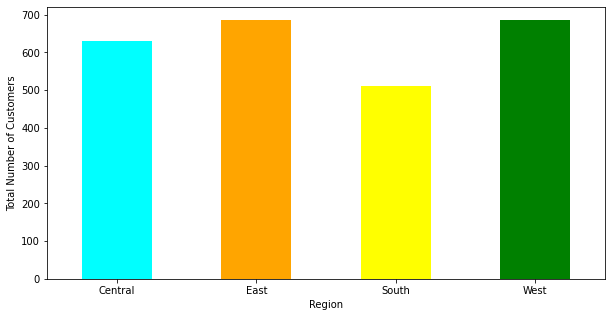

In [ ]:
# Total Number of customers in each region
plt.figure(figsize = (10, 5))
df_1.groupby('Region')['CustomerID'].nunique().plot.bar(color=['cyan', 'orange', 'yellow', 'green'])
plt.xticks(rotation = 0)
plt.xlabel('Region')
plt.ylabel('Total Number of Customers')

Text(0, 0.5, 'Sales')

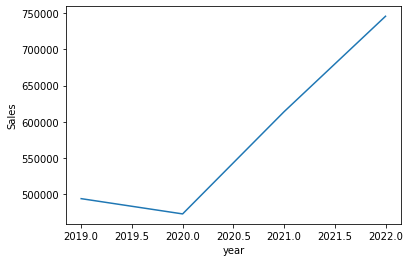

In [ ]:
# Total sales change in each year
dateGrouped = df_1.groupby('OrderDate', as_index = False)['Sales', 'Profit', 'Quantity'].sum()
dateGrouped['OrderDate'] = pd.to_datetime(dateGrouped['OrderDate'], infer_datetime_format= True)
dateGrouped['month_year'] = dateGrouped['OrderDate'].dt.to_period('M')
dateGrouped['year'] = dateGrouped['OrderDate'].dt.year
dateGrouped['month'] = dateGrouped['OrderDate'].dt.month_name()
dateGrouped.groupby('year')['Sales'].sum().plot()
plt.ylabel('Sales')

In [ ]:
dateGrouped.head()

,OrderDate,Sales,Profit,Quantity,month_year,year,month
0,2022-01-01,1481.828,-181.4109,56,2022-01,2022,January
1,2019-01-10,54.830,22.6537,2,2019-01,2019,January
2,2020-01-10,1018.104,-373.3048,4,2020-01,2020,January
3,2021-01-10,174.750,55.3653,11,2021-01,2021,January
4,2019-01-11,9.940,3.0814,2,2019-01,2019,January


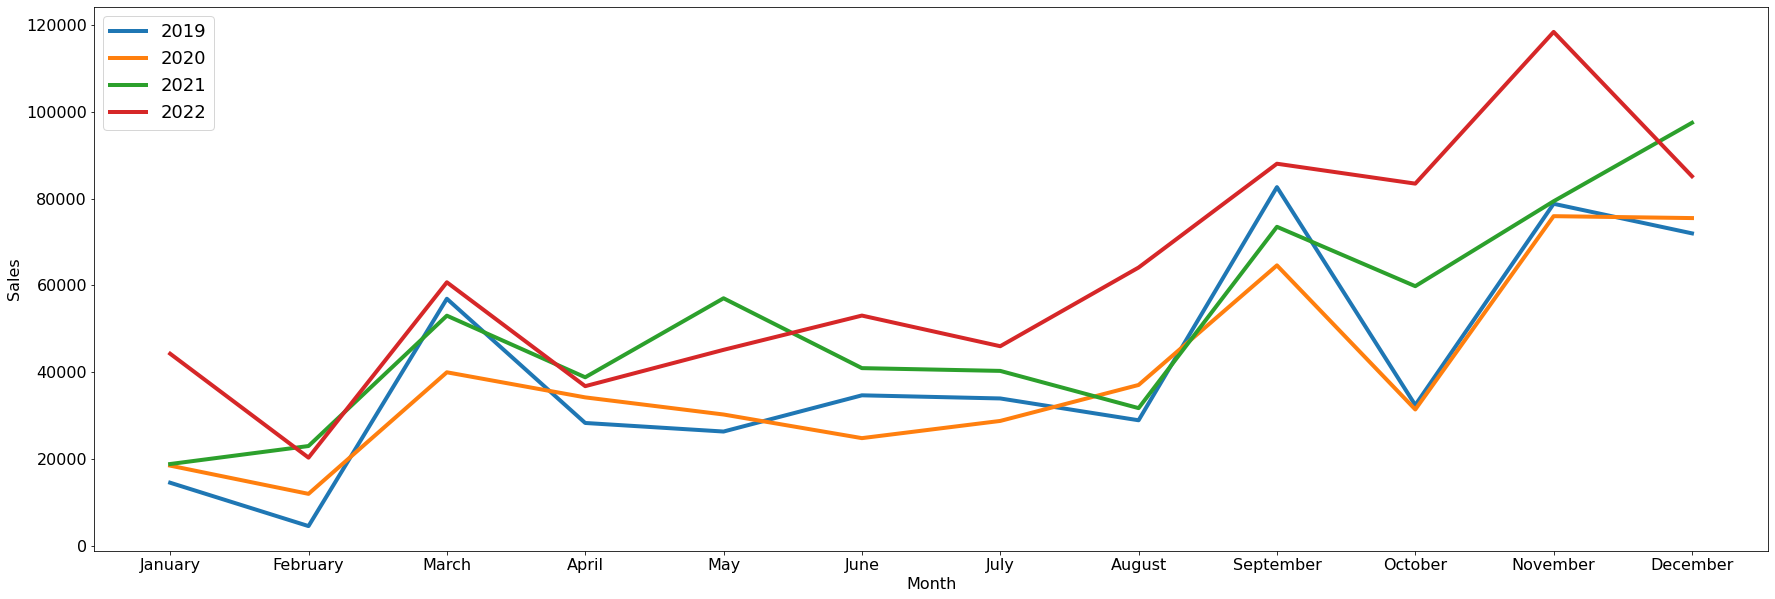

Text(0, 0.5, 'Profit')

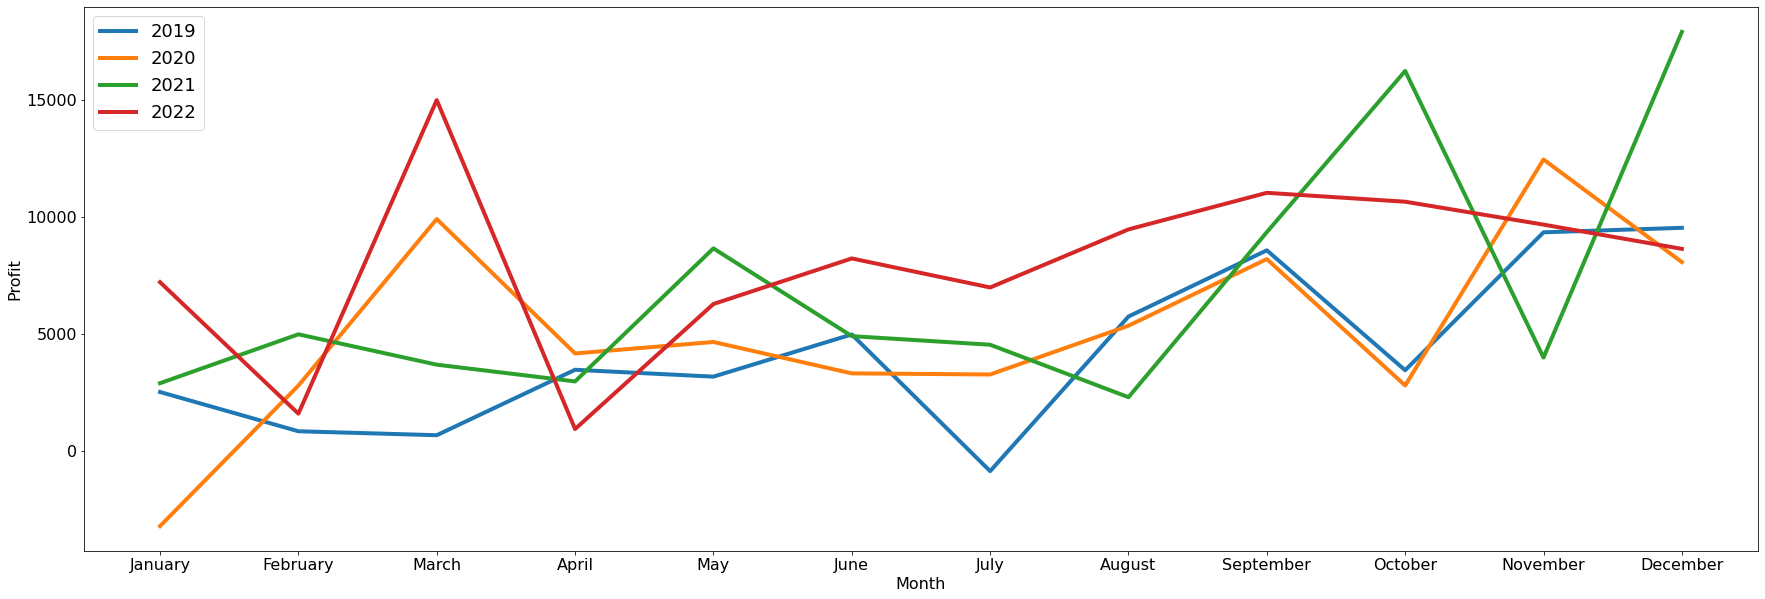

In [ ]:
# Each year Sales and Profit changes by month 

plt.rc('font', size = 16)
# Set the axes title font size
plt.rc('axes', titlesize = 16)
# Set the axes labels font size
plt.rc('axes', labelsize = 16)
# Set the font size for x tick labels
plt.rc('xtick', labelsize = 16)
# Set the font size for  y tick labels
plt.rc('ytick', labelsize = 16)
# Set the legend font size
plt.rc('legend', fontsize = 18)
# Set the font size of the figure title
plt.rc('figure', titlesize = 20)

df_2019 = dateGrouped[dateGrouped['year']==2019][['month', 'Sales', 'Profit', 'Quantity']]
df_2019 = df_2019.groupby('month').agg({'Sales' : 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index().rename(columns={'sales': 's13'})
df_2019 = Sort_Dataframeby_Month(df=df_2019, monthcolumnname='month')
df_2020 = dateGrouped[dateGrouped['year']==2020][['month', 'Sales', 'Profit', 'Quantity']]
df_2020 = df_2020.groupby('month').agg({'Sales' : 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index().rename(columns={'sales': 's13'})
df_2020 = Sort_Dataframeby_Month(df_2020, monthcolumnname='month')
df_2021 = dateGrouped[dateGrouped['year']==2021][['month', 'Sales', 'Profit', 'Quantity']]
df_2021 = df_2021.groupby('month').agg({'Sales' : 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index().rename(columns={'sales': 's13'})
df_2021 = Sort_Dataframeby_Month(df_2021, monthcolumnname='month')
df_2022 = dateGrouped[dateGrouped['year']==2022][['month', 'Sales', 'Profit', 'Quantity']]
df_2022 = df_2022.groupby('month').agg({'Sales' : 'sum', 'Profit': 'sum', 'Quantity': 'sum'}).reset_index().rename(columns={'sales': 's13'})
df_2022 = Sort_Dataframeby_Month(df_2022, monthcolumnname='month')

plt.figure(figsize=(30,10))
plt.plot(df_2019.month, df_2019.Sales,label = '2019', linewidth=4)
plt.plot(df_2020.month, df_2020.Sales, label = '2020',linewidth=4)
plt.plot(df_2021.month, df_2021.Sales,label = '2021',linewidth=4)
plt.plot(df_2022.month, df_2022.Sales, label = '2022', linewidth=4)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Sales')
plt.show()

plt.figure(figsize=(30,10))
plt.plot(df_2019.month, df_2019.Profit,label = '2019', linewidth=4)
plt.plot(df_2020.month, df_2020.Profit, label = '2020',linewidth=4)
plt.plot(df_2021.month, df_2021.Profit,label = '2021',linewidth=4)
plt.plot(df_2022.month, df_2022.Profit, label = '2022', linewidth=4)
plt.legend()
plt.xlabel('Month')
plt.ylabel('Profit')

In [ ]:
sales_df = df_1[['OrderDate', 'Sales']]
sales_df['OrderDate'] = pd.to_datetime(sales_df['OrderDate'])
sales_df = sales_df.sort_values('OrderDate')
sales_df = sales_df.groupby('OrderDate', as_index = False)['Sales'].sum()
sales_df = sales_df.groupby([pd.Grouper(key='OrderDate', freq='W')])['Sales'].sum()
sales_df = sales_df.reset_index().set_index('OrderDate')
sales_df.head(-1)

,Sales
OrderDate,
2019-01-06,4731.144
2019-01-13,3746.267
2019-01-20,3629.202
2019-01-27,1876.348
2019-02-03,1312.752
...,...
2022-11-27,18717.229
2022-12-04,33532.718
2022-12-11,24416.215


<AxesSubplot:xlabel='OrderDate'>

<Figure size 2520x2520 with 0 Axes>

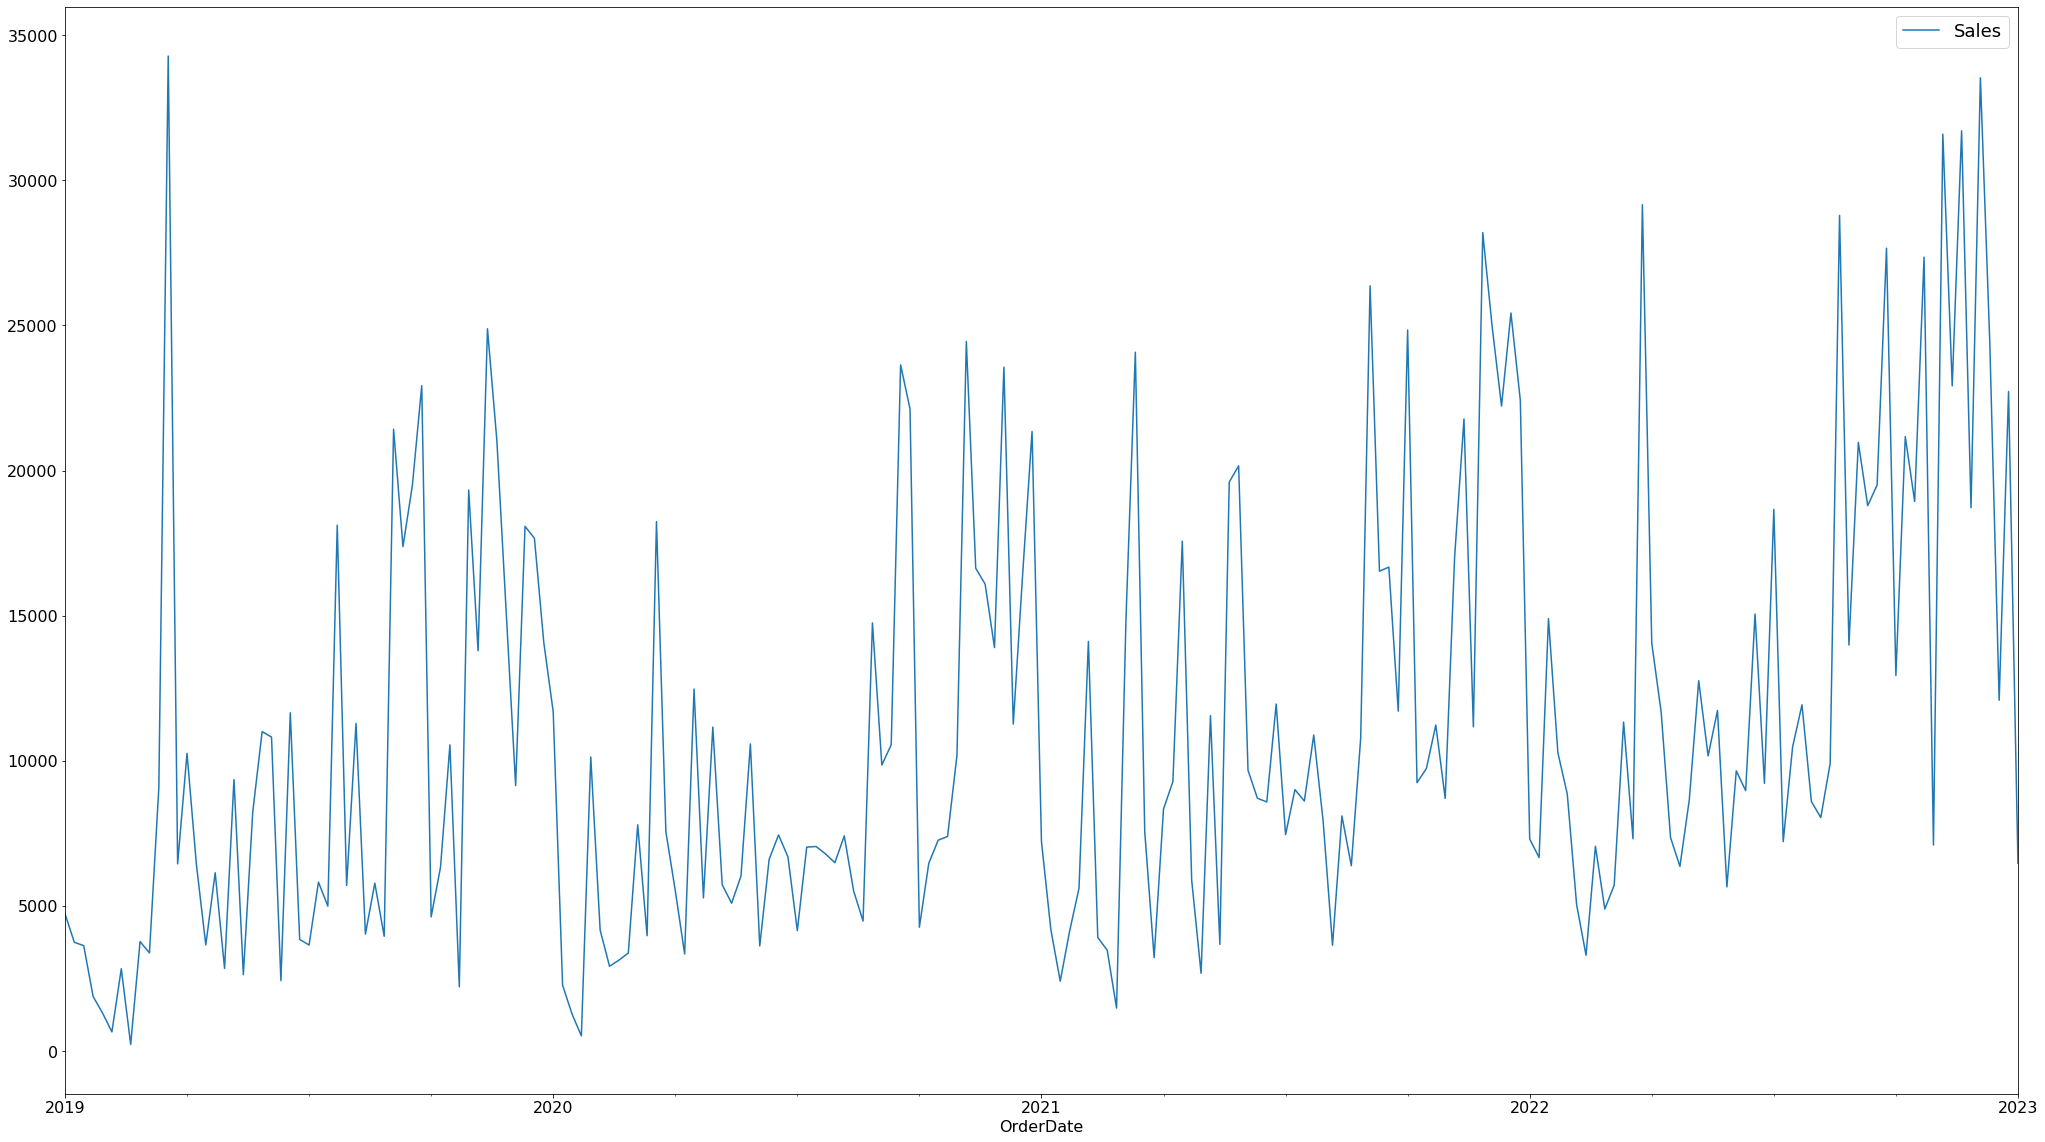

In [ ]:
# ploting sales change over time
plt.figure(figsize = (35,35))
sales_df.plot(figsize = (35,20))

<AxesSubplot:xlabel='OrderDate'>

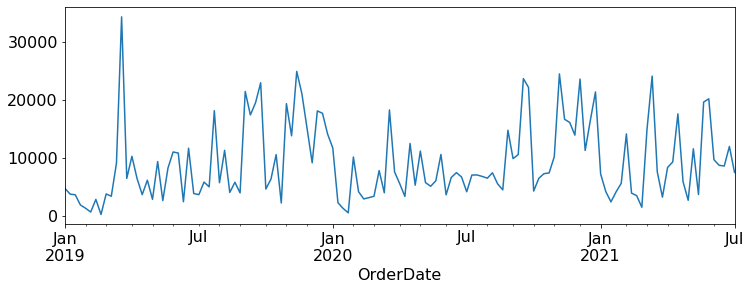

In [ ]:
sales_df['Sales'].plot(xlim=['2019-01-06', '2021-07-03'], figsize=(12,4))

In [ ]:
# Check whether time series is stationary or not
from statsmodels.tsa.stattools import adfuller

result = adfuller(sales_df['Sales'])
result[1]

2.710476963737102e-07

Using above result we can conclude that p value is high so time series is not stationary

# **Model building** 

### **Auto Regressive Model**

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

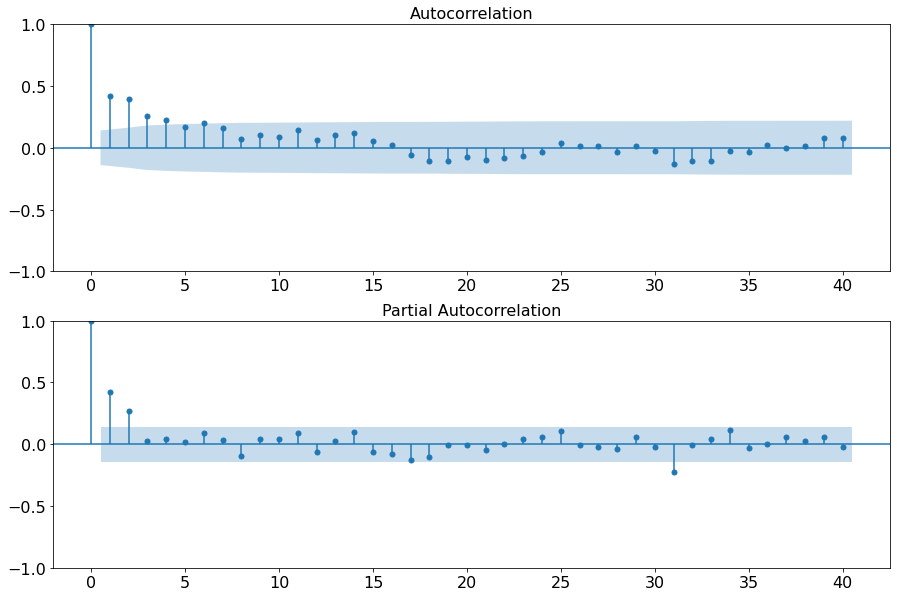

In [ ]:
fig = plt.figure(figsize=(15,10))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(sales_df['Sales'].iloc[13:], lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(sales_df['Sales'].iloc[13:], lags=40, ax=ax2)


## **Arima**

In [ ]:
plt.rc('font', size = 10)
plt.rc('axes', titlesize=10)
plt.rc('axes', labelsize=10)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('legend', fontsize=10)
plt.rc('figure', titlesize=20)

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2022,4,25)

train_data = sales_df[:train_dataset_end]
test_data = sales_df[train_dataset_end+timedelta(days=1):]

In [ ]:
train_data.shape, test_data.shape

((173, 2), (36, 2))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)


<AxesSubplot:xlabel='OrderDate'>

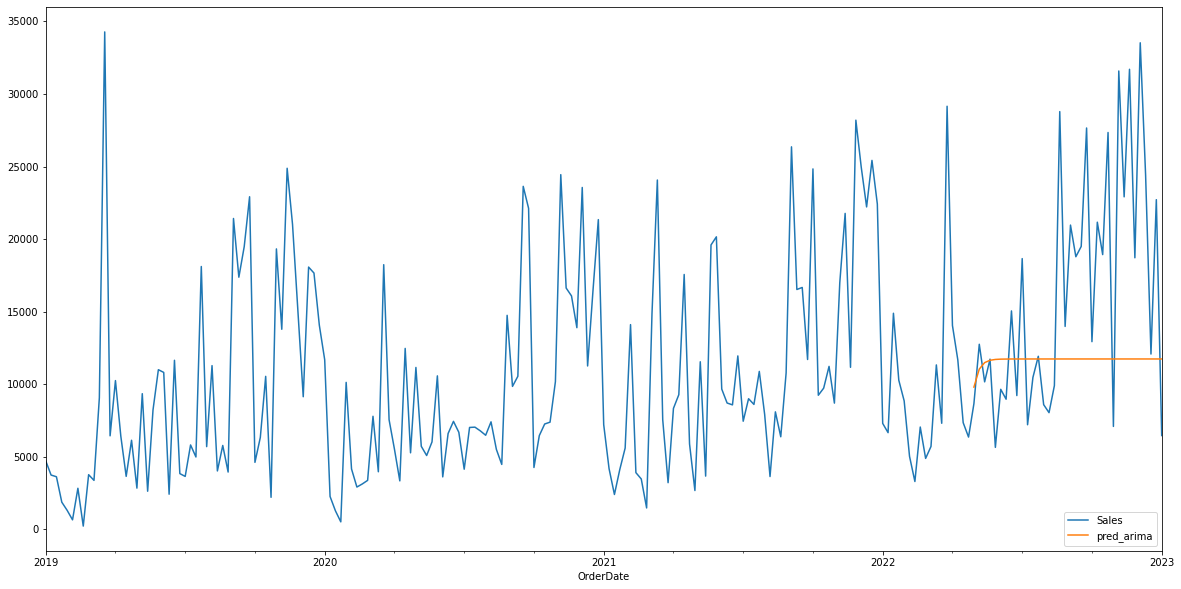

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model_ARIMA = ARIMA(train_data['Sales'], order=(1,1,1))
model_Arima_fit = model_ARIMA.fit()
model_Arima_fit.summary()

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
sales_df['pred_arima'] = model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
sales_df[['Sales', 'pred_arima']].plot(figsize = (20,10))

### **Tuning ARIMA**

In [ ]:
from sklearn.metrics import mean_squared_error

p_values = [0,1]
d_values = range(0, 3)
q_values = range(0, 20)

df_order = pd.DataFrame(columns= ['order', 'MSE'])
i = 0
for p in p_values:
  for d in d_values:
    for q in q_values:
      order = (p,d,q)
      warnings.filterwarnings('ignore')
      model = ARIMA(train_data['Sales'], order= order).fit()
      predictions = model.predict(start= pred_start_date, end= pred_end_date)
      error = mean_squared_error(test_data,predictions)
      row = [order, error]
      i = i + 1
      df_order.loc[i] = row

In [ ]:
df_order.MSE.min()
df_order[df_order.MSE == df_order.MSE.min()]

,order,MSE
111,"(1, 2, 10)",6.630559e+07


<AxesSubplot:xlabel='OrderDate'>

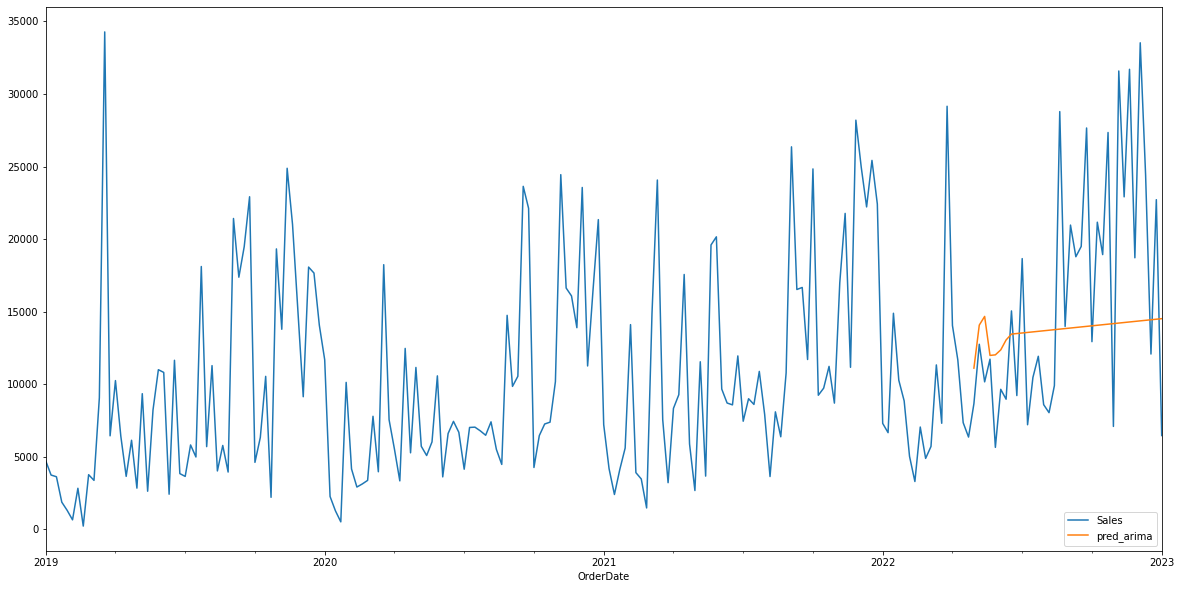

In [ ]:
model_ARIMA=ARIMA(train_data['Sales'],order=(1, 2, 10))
model_Arima_fit=model_ARIMA.fit()
model_Arima_fit.summary()

sales_df['pred_arima']=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
sales_df[['Sales','pred_arima']].plot(figsize =(20,10))

### **SARIMA**

In [ ]:
# from sklearn.metrics import mean_squared_error
# from statsmodels.tsa.statespace.sarimax import SARIMAX

# p_values = [0, 1]
# d_values = [i for i in range(10) if i%3==1]
# q_values = [i for i in range(10) if i%3==1]

# a_values = [0,1]
# b_values = [i for i in range(10) if i%3==1]
# c_values = [i for i in range(10) if i%3==1]
# m_values = [i for i in range(2,15) if i%3==1]

# df_order = pd.DataFrame(columns=['order','seasonal_order','MSE'])
# i = 0
# for p in p_values:
#     for d in d_values:
#         for q in q_values:
#             for a in a_values:
#                 for b in b_values:
#                     for c in c_values:
#                         for m in m_values:
#                             if m>q:
#                                 order = (p,d,q)
#                                 seasonal_order = (a,b,c,m)
#                                 warnings.filterwarnings("ignore")
#                                 model= SARIMAX(train_data['Sales'],order=order,seasonal_order=seasonal_order).fit()
#                                 predictions = model.predict(start=pred_start_date,end=pred_end_date)
#                                 error = mean_squared_error(test_data, predictions)
#                                 row = [order,seasonal_order,error]
#                                 i = i+1
#                                 df_order.loc[i] = row

## **LSTM**

In [ ]:
from datetime import datetime, timedelta
train_dataset_end = datetime(2022,12,25)

train_data = sales_df[:train_dataset_end]
test_data = sales_df[train_dataset_end+timedelta(days=1):]

In [ ]:
from keras.preprocessing.sequence import TimeseriesGenerator

In [ ]:
n_input = 36
n_features = 1
generator = TimeseriesGenerator(train_data['Sales'], train_data['Sales'], length=n_input, batch_size=1)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.layers import LSTM

In [ ]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features),return_sequences=True))
model.add(LSTM(100, activation='relu', return_sequences=True))
model.add(LSTM(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(generator, epochs=100)

Epoch 1/100
172/172 [==============================] - 10s 35ms/step - loss: 769303744.0000
Epoch 2/100
172/172 [==============================] - 6s 35ms/step - loss: 539743488.0000
Epoch 3/100
172/172 [==============================] - 7s 40ms/step - loss: 292817632.0000
Epoch 4/100
172/172 [==============================] - 6s 34ms/step - loss: 298006848.0000
Epoch 5/100
172/172 [==============================] - 7s 40ms/step - loss: 218606992.0000
Epoch 6/100
172/172 [==============================] - 6s 34ms/step - loss: 336887424.0000
Epoch 7/100
172/172 [==============================] - 7s 40ms/step - loss: 165530336.0000
Epoch 8/100
172/172 [==============================] - 6s 36ms/step - loss: 141910048.0000
Epoch 9/100
172/172 [==============================] - 6s 34ms/step - loss: 110676872.0000
Epoch 10/100
172/172 [==============================] - 7s 40ms/step - loss: 372404736.0000
Epoch 11/100
172/172 [==============================] - 6s 34ms/step - loss: 824981952.0

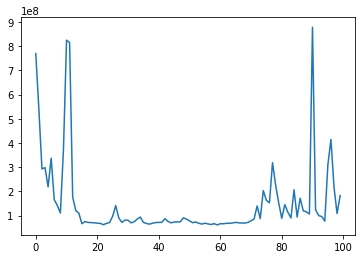

In [ ]:
loss_per_epoch = model.history.history['loss']
plt.plot(range(len(loss_per_epoch)),loss_per_epoch)

In [ ]:
test_predictions = []

first_eval_batch = np.array(test_data['Sales'][-n_input:])
current_batch = first_eval_batch.reshape((1, n_input, n_features))

for i in range(len(test_data)):
    
    current_pred = model.predict(current_batch)[0]
    
    test_predictions.append(current_pred) 
    
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

1/1 [==============================] - 0s 24ms/step


In [ ]:
len(test_data)

36

In [ ]:
test_predictions = np.array(test_predictions)

In [ ]:
test_data['LSTM_Predictions'] = test_predictions
test_data.head()

,Sales,pred_arima,LSTM_Predictions
OrderDate,,,
2022-05-01,8663.3486,11113.395640,9338.989258
2022-05-08,12757.8558,14079.017330,6024.160156
2022-05-15,10167.7790,14677.745936,7376.784180
2022-05-22,11730.7660,11988.717192,10104.855469
2022-05-29,5653.8210,12028.892131,8948.906250


<AxesSubplot:xlabel='OrderDate'>

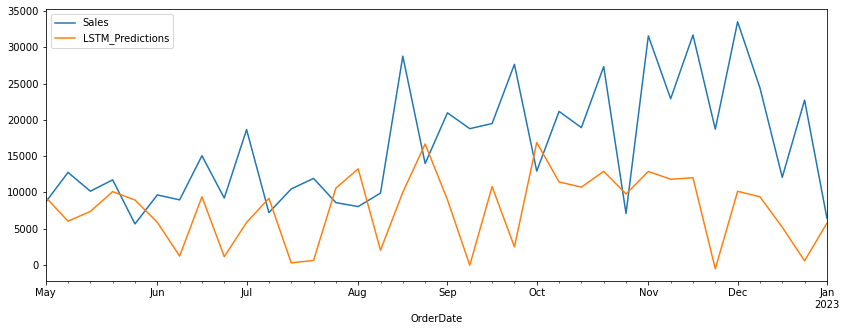

In [ ]:
test_data[['Sales','LSTM_Predictions']].plot(figsize=(14,5))

## **Overall**

<AxesSubplot:xlabel='OrderDate'>

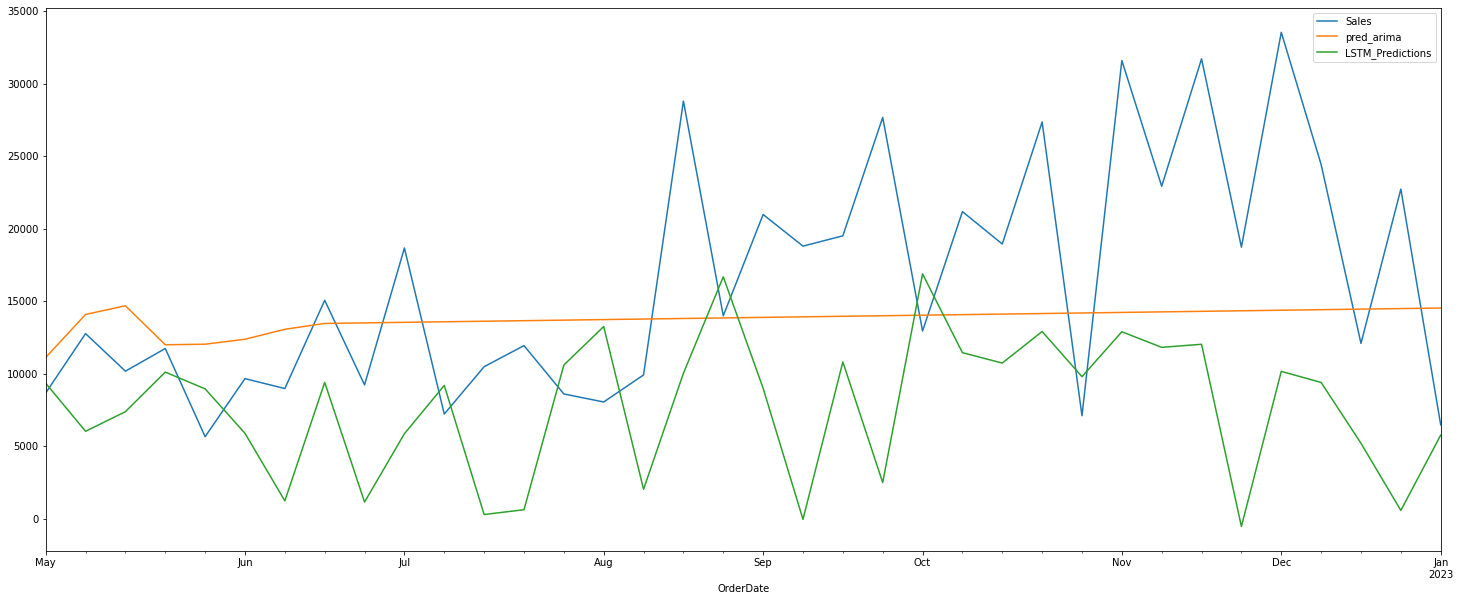

In [ ]:
test_data['pred_arima']=model_Arima_fit.predict(start=pred_start_date,end=pred_end_date)
test_data.plot(figsize=(25,10))